Glenn Hubbard DS 320 Final Project

In [1]:
import pandas as pd
import numpy as np


In [2]:
### Loading Data
###Ages>50 and <18 removed

maternal_data = pd.read_csv('/Users/glennhubbard/Desktop/Senior/ds_320/Maternal.csv')

fetal_data = pd.read_csv('/Users/glennhubbard/Desktop/Senior/ds_320/fetal_data.csv')

In [3]:
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     18          90           60   7.5      98.0         70   low risk
1     18          90           60   6.9      98.0         70   mid risk
2     18         120           80   6.9     102.0         76   mid risk
3     18         100           70   6.7      98.0         76   low risk
4     18          90           60   7.5      98.0         70   low risk
..   ...         ...          ...   ...       ...        ...        ...
721   50         130          100  16.0      98.0         75  high risk
722   50         120           80  15.0      98.0         70  high risk
723   50         140           95  17.0      98.0         60  high risk
724   50         140           90  15.0      98.0         77  high risk
725   50         130          100  16.0      98.0         76  high risk

[726 rows x 7 columns]

In [4]:
fetal_data

baseline value  abnormal_short_term_variability  \
0                120                               73   
1                132                               17   
2                133                               16   
3                134                               16   
4                132                               16   
...              ...                              ...   
2121             140                               79   
2122             140                               78   
2123             140                               79   
2124             140                               78   
2125             142                               74   

      mean_value_of_short_term_variability  histogram_mean  fetal_health  
0                                      0.5             137             2  
1                                      2.1             136             1  
2                                      2.1             135             1  
3                                      2.4             134             1  
4                                      2.4             136             1  
...                                    ...             ...           ...  
2121                                   0.2             150             2  
2122                                   0.4             148             2  
2123                                   0.4             148             2  
2124                                   0.4             147             2  
2125                                   0.4             143             1  

[2126 rows x 5 columns]

In [5]:
###Data Cleaning
###Cleaning up tables
maternal_data.loc[maternal_data["RiskLevel"] == "low risk", "RiskLevel"] = 1
maternal_data.loc[maternal_data["RiskLevel"] == "mid risk", "RiskLevel"] = 2
maternal_data.loc[maternal_data["RiskLevel"] == "high risk", "RiskLevel"] = 3

In [6]:
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
0     18          90           60   7.5      98.0         70         1
1     18          90           60   6.9      98.0         70         2
2     18         120           80   6.9     102.0         76         2
3     18         100           70   6.7      98.0         76         1
4     18          90           60   7.5      98.0         70         1
..   ...         ...          ...   ...       ...        ...       ...
721   50         130          100  16.0      98.0         75         3
722   50         120           80  15.0      98.0         70         3
723   50         140           95  17.0      98.0         60         3
724   50         140           90  15.0      98.0         77         3
725   50         130          100  16.0      98.0         76         3

[726 rows x 7 columns]

In [7]:

###Extracted variables within maternal health BP_Risk

def calc_new_col(row):
    if row['SystolicBP'] < 120 and row['DiastolicBP'] < 80:
        return "Normal"
    elif row['SystolicBP'] >=120 and row['SystolicBP'] <=129 and row['DiastolicBP'] < 80:
        return "Elevated"
    elif row['SystolicBP'] >= 130 and row['SystolicBP'] <139 and row['DiastolicBP'] <89 and row['DiastolicBP'] >=80:
        return "HP1"
    elif row['SystolicBP'] >=140 and row['SystolicBP'] <180 and row['DiastolicBP'] >= 90:
        return "HP2"
    elif row['SystolicBP'] >=180  and row['DiastolicBP'] >= 120:
        return "Crisis"
    else:
        return "Elevated"

maternal_data["BP_Risk"] = maternal_data.apply(calc_new_col, axis=1)



In [8]:
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel  \
0     18          90           60   7.5      98.0         70         1   
1     18          90           60   6.9      98.0         70         2   
2     18         120           80   6.9     102.0         76         2   
3     18         100           70   6.7      98.0         76         1   
4     18          90           60   7.5      98.0         70         1   
..   ...         ...          ...   ...       ...        ...       ...   
721   50         130          100  16.0      98.0         75         3   
722   50         120           80  15.0      98.0         70         3   
723   50         140           95  17.0      98.0         60         3   
724   50         140           90  15.0      98.0         77         3   
725   50         130          100  16.0      98.0         76         3   

      BP_Risk  
0      Normal  
1      Normal  
2    Elevated  
3      Normal  
4      Normal  
..        ...  
721  Elevated  
722  Elevated  
723       HP2  
724       HP2  
725  Elevated  

[726 rows x 8 columns]

In [9]:

###Extracted variables within maternal health BS

def calc_new_col_2(row):
    if row['BS'] < 7:
        return "Excellent"
    elif row['BS'] >7 and row['BS'] <9:
        return "Good"
    else:
        return "Poor"
   

maternal_data["BS_Rank"] = maternal_data.apply(calc_new_col_2, axis=1)
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel  \
0     18          90           60   7.5      98.0         70         1   
1     18          90           60   6.9      98.0         70         2   
2     18         120           80   6.9     102.0         76         2   
3     18         100           70   6.7      98.0         76         1   
4     18          90           60   7.5      98.0         70         1   
..   ...         ...          ...   ...       ...        ...       ...   
721   50         130          100  16.0      98.0         75         3   
722   50         120           80  15.0      98.0         70         3   
723   50         140           95  17.0      98.0         60         3   
724   50         140           90  15.0      98.0         77         3   
725   50         130          100  16.0      98.0         76         3   

      BP_Risk    BS_Rank  
0      Normal       Good  
1      Normal  Excellent  
2    Elevated  Excellent  
3      Normal  Excellent  
4      Normal       Good  
..        ...        ...  
721  Elevated       Poor  
722  Elevated       Poor  
723       HP2       Poor  
724       HP2       Poor  
725  Elevated       Poor  

[726 rows x 9 columns]

In [10]:

###Extracted variables within maternal health Temperature

def calc_new_col_3(row):
    if row['BodyTemp'] < 100:
        return "Healthy"
    else:
        return "Sick"
   

maternal_data["BodyTemp_Rank"] = maternal_data.apply(calc_new_col_3, axis=1)
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel  \
0     18          90           60   7.5      98.0         70         1   
1     18          90           60   6.9      98.0         70         2   
2     18         120           80   6.9     102.0         76         2   
3     18         100           70   6.7      98.0         76         1   
4     18          90           60   7.5      98.0         70         1   
..   ...         ...          ...   ...       ...        ...       ...   
721   50         130          100  16.0      98.0         75         3   
722   50         120           80  15.0      98.0         70         3   
723   50         140           95  17.0      98.0         60         3   
724   50         140           90  15.0      98.0         77         3   
725   50         130          100  16.0      98.0         76         3   

      BP_Risk    BS_Rank BodyTemp_Rank  
0      Normal       Good       Healthy  
1      Normal  Excellent       Healthy  
2    Elevated  Excellent          Sick  
3      Normal  Excellent       Healthy  
4      Normal       Good       Healthy  
..        ...        ...           ...  
721  Elevated       Poor       Healthy  
722  Elevated       Poor       Healthy  
723       HP2       Poor       Healthy  
724       HP2       Poor       Healthy  
725  Elevated       Poor       Healthy  

[726 rows x 10 columns]

In [11]:
###Extracted derivation of healthiness

### Based on BS, BodyTemp, RiskLevel, BP_Risk

###We will be looking most likely for the hypoxia of the fetus
###BS will increase gestational diabetic risk of macrosomia, BP also increases risk, RiskLevel is derived from prior comorbidities, so this will be weighed accordingly
###Body Temp is likely representative of other complications, so this will also be a generic risk. 

###This will be a ranked choice derivative classification
###For instance, being sick, poor BS, risk level 3, and HP1 will have a fetal ranked risk that is much higher than other values
###Fetal Risk will be evaluated out of three, with 1 being the lowest and three being high risk


def calc_new_col_4(row):
    if row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "1"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "1"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "2"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "1"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "1"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Normal':
        return "2"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Elevated':
        return "1"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP1':
        return "1"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP2':
        return "2"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Crisis':
        return "3"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "1"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Normal':
        return "2"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "2"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Normal':
        return "3"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "3"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Normal':
        return "3"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP1':
        return "1"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP2':
        return "2"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP1':
        return "3"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='HP2':
        return "3"
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Crisis':
        return "3"
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "2"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Elevated':
        return "3"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "2"  
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "2"  
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Elevated':
        return "1"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Elevated':
        return "1"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='HP1':
        return "3"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP1':
        return "3"
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "1"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==2 and row['BP_Risk'] =='HP1':
        return "2"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Normal':
        return "2"  
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Elevated':
        return "3" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "1" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='HP2':
        return "2" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Elevated':
        return "3" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Healthy' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Elevated':
        return "2" 
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Elevated':
        return "2" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='HP2':
        return "3" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Elevated':
        return "1" 
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "3" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Normal':
        return "2" 
    elif row['BS_Rank'] =="Poor" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==3 and row['BP_Risk'] =='Elevated':
        return "3" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "1" 
    elif row['BS_Rank'] =="Good" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==1 and row['BP_Risk'] =='Elevated':
        return "1" 
    elif row['BS_Rank'] =="Excellent" and row['BodyTemp_Rank'] =='Sick' and row['RiskLevel'] ==2 and row['BP_Risk'] =='Normal':
        return "1" 



maternal_data["FetalRisk"] = maternal_data.apply(calc_new_col_4, axis=1)
maternal_data

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel  \
0     18          90           60   7.5      98.0         70         1   
1     18          90           60   6.9      98.0         70         2   
2     18         120           80   6.9     102.0         76         2   
3     18         100           70   6.7      98.0         76         1   
4     18          90           60   7.5      98.0         70         1   
..   ...         ...          ...   ...       ...        ...       ...   
721   50         130          100  16.0      98.0         75         3   
722   50         120           80  15.0      98.0         70         3   
723   50         140           95  17.0      98.0         60         3   
724   50         140           90  15.0      98.0         77         3   
725   50         130          100  16.0      98.0         76         3   

      BP_Risk    BS_Rank BodyTemp_Rank FetalRisk  
0      Normal       Good       Healthy         1  
1      Normal  Excellent       Healthy         1  
2    Elevated  Excellent          Sick         1  
3      Normal  Excellent       Healthy         1  
4      Normal       Good       Healthy         1  
..        ...        ...           ...       ...  
721  Elevated       Poor       Healthy         3  
722  Elevated       Poor       Healthy         3  
723       HP2       Poor       Healthy         3  
724       HP2       Poor       Healthy         3  
725  Elevated       Poor       Healthy         3  

[726 rows x 11 columns]

In [12]:
import plotly.express as px
fig = px.histogram(maternal_data, x="FetalRisk", title="Maternal Health Derived Health Score")
fig.show()

In [13]:
#### Derivitive metrics from the fetal data

### Heart Rate values

def calc_new_col_5(row):
    if row['histogram_mean'] <=110:
        return "Low"
    elif row['histogram_mean'] > 160:
        return "High"
    else:
        return "Normal"
   

fetal_data["histogram_mean_rank"] = fetal_data.apply(calc_new_col_5, axis=1)
fetal_data

baseline value  abnormal_short_term_variability  \
0                120                               73   
1                132                               17   
2                133                               16   
3                134                               16   
4                132                               16   
...              ...                              ...   
2121             140                               79   
2122             140                               78   
2123             140                               79   
2124             140                               78   
2125             142                               74   

      mean_value_of_short_term_variability  histogram_mean  fetal_health  \
0                                      0.5             137             2   
1                                      2.1             136             1   
2                                      2.1             135             1   
3                                      2.4             134             1   
4                                      2.4             136             1   
...                                    ...             ...           ...   
2121                                   0.2             150             2   
2122                                   0.4             148             2   
2123                                   0.4             148             2   
2124                                   0.4             147             2   
2125                                   0.4             143             1   

     histogram_mean_rank  
0                 Normal  
1                 Normal  
2                 Normal  
3                 Normal  
4                 Normal  
...                  ...  
2121              Normal  
2122              Normal  
2123              Normal  
2124              Normal  
2125              Normal  

[2126 rows x 6 columns]

In [14]:
###Percentage abnormal time heart rate

def calc_new_col_6(row):
    if row['mean_value_of_short_term_variability'] <2:
        return "Normal"
    elif row['mean_value_of_short_term_variability'] >=2 and row['mean_value_of_short_term_variability'] <=4:
        return "Mid"
    else:
        return "High"
   

fetal_data["mean_value_of_short_term_variability_rank"] = fetal_data.apply(calc_new_col_6, axis=1)
fetal_data

baseline value  abnormal_short_term_variability  \
0                120                               73   
1                132                               17   
2                133                               16   
3                134                               16   
4                132                               16   
...              ...                              ...   
2121             140                               79   
2122             140                               78   
2123             140                               79   
2124             140                               78   
2125             142                               74   

      mean_value_of_short_term_variability  histogram_mean  fetal_health  \
0                                      0.5             137             2   
1                                      2.1             136             1   
2                                      2.1             135             1   
3                                      2.4             134             1   
4                                      2.4             136             1   
...                                    ...             ...           ...   
2121                                   0.2             150             2   
2122                                   0.4             148             2   
2123                                   0.4             148             2   
2124                                   0.4             147             2   
2125                                   0.4             143             1   

     histogram_mean_rank mean_value_of_short_term_variability_rank  
0                 Normal                                    Normal  
1                 Normal                                       Mid  
2                 Normal                                       Mid  
3                 Normal                                       Mid  
4                 Normal                                       Mid  
...                  ...                                       ...  
2121              Normal                                    Normal  
2122              Normal                                    Normal  
2123              Normal                                    Normal  
2124              Normal                                    Normal  
2125              Normal                                    Normal  

[2126 rows x 7 columns]

In [15]:
###Derivitive Value for total fetal health

###Percentage abnormal time heart rate

###Weighing fetal health higher, outweights other variables

def calc_new_col_7(row):
    if row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==1:
        return "1"
    elif row['mean_value_of_short_term_variability_rank'] =="Mid" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==1:
        return "1"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==1:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="High" and row['fetal_health'] ==1:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="High" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==1:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==2:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==3:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="Mid" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==3:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="High" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==3:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==3:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="High" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==1:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Mid" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==1:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="High" and row['fetal_health'] ==2:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Mid" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==2:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="Mid" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==3:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="High" and row['histogram_mean_rank'] =="Normal" and row['fetal_health'] ==2:
        return "2"
    elif row['mean_value_of_short_term_variability_rank'] =="High" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==2:
        return "3"
    elif row['mean_value_of_short_term_variability_rank'] =="Normal" and row['histogram_mean_rank'] =="Low" and row['fetal_health'] ==2:
        return "2"
  
   

fetal_data["derived_health"] = fetal_data.apply(calc_new_col_7, axis=1)
fetal_data

baseline value  abnormal_short_term_variability  \
0                120                               73   
1                132                               17   
2                133                               16   
3                134                               16   
4                132                               16   
...              ...                              ...   
2121             140                               79   
2122             140                               78   
2123             140                               79   
2124             140                               78   
2125             142                               74   

      mean_value_of_short_term_variability  histogram_mean  fetal_health  \
0                                      0.5             137             2   
1                                      2.1             136             1   
2                                      2.1             135             1   
3                                      2.4             134             1   
4                                      2.4             136             1   
...                                    ...             ...           ...   
2121                                   0.2             150             2   
2122                                   0.4             148             2   
2123                                   0.4             148             2   
2124                                   0.4             147             2   
2125                                   0.4             143             1   

     histogram_mean_rank mean_value_of_short_term_variability_rank  \
0                 Normal                                    Normal   
1                 Normal                                       Mid   
2                 Normal                                       Mid   
3                 Normal                                       Mid   
4                 Normal                                       Mid   
...                  ...                                       ...   
2121              Normal                                    Normal   
2122              Normal                                    Normal   
2123              Normal                                    Normal   
2124              Normal                                    Normal   
2125              Normal                                    Normal   

     derived_health  
0                 2  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
2121              2  
2122              2  
2123              2  
2124              2  
2125              1  

[2126 rows x 8 columns]

In [16]:
fig = px.histogram(fetal_data, x="derived_health", title="Fetal Health Derived Health Score")
fig.show()

In [17]:
###Join maternal and fetal data on derivitive values of risk. Likely, if the mother is at risk, then so is the fetus, and if the fetus is at risk, so is the mother
### We will be looking to see if the blood pressure, body temp, or heart rate and other values affect either of their healths

combined_data=pd.merge(fetal_data, maternal_data, how='left', left_on=['derived_health'], right_on=['FetalRisk'])
combined_data = combined_data.drop_duplicates()
combined_data = combined_data.drop(['fetal_health','histogram_mean_rank','mean_value_of_short_term_variability_rank','derived_health','BP_Risk','BS_Rank','BodyTemp_Rank','RiskLevel'], axis=1)
combined_data = combined_data.drop_duplicates()

combined_data

baseline value  abnormal_short_term_variability  \
0                  120                               73   
2                  120                               73   
6                  120                               73   
9                  120                               73   
17                 120                               73   
...                ...                              ...   
692375             142                               74   
692377             142                               74   
692379             142                               74   
692380             142                               74   
692381             142                               74   

        mean_value_of_short_term_variability  histogram_mean  Age  SystolicBP  \
0                                        0.5             137   18         120   
2                                        0.5             137   19         120   
6                                        0.5             137   19         120   
9                                        0.5             137   19          90   
17                                       0.5             137   19         120   
...                                      ...             ...  ...         ...   
692375                                   0.4             143   49         120   
692377                                   0.4             143   50         140   
692379                                   0.4             143   50         120   
692380                                   0.4             143   50         120   
692381                                   0.4             143   50         120   

        DiastolicBP    BS  BodyTemp  HeartRate FetalRisk  
0                80   7.9     102.0         76         2  
2                80   7.0      98.0         70         2  
6                85   7.8      98.0         60         2  
9                65  11.0     101.0         70         2  
17               85   9.0      98.0         60         2  
...             ...   ...       ...        ...       ...  
692375           90   7.5      98.0         77         1  
692377           80   6.7      98.0         70         1  
692379           80   7.7      98.0         70         1  
692380           80   7.9      98.0         70         1  
692381           80   7.5      98.0         70         1  

[292859 rows x 11 columns]

In [18]:
fig = px.histogram(combined_data, x="FetalRisk",title="Combined Data Risk Count")
fig.show()

                                      baseline value  \
baseline value                              1.000000   
abnormal_short_term_variability             0.293447   
mean_value_of_short_term_variability       -0.238719   
histogram_mean                              0.725250   
Age                                         0.019225   
SystolicBP                                  0.006457   
DiastolicBP                                 0.003292   
BS                                          0.053827   
BodyTemp                                    0.026844   
HeartRate                                   0.015033   

                                      abnormal_short_term_variability  \
baseline value                                               0.293447   
abnormal_short_term_variability                              1.000000   
mean_value_of_short_term_variability                        -0.396927   
histogram_mean                                               0.094339   
Age               

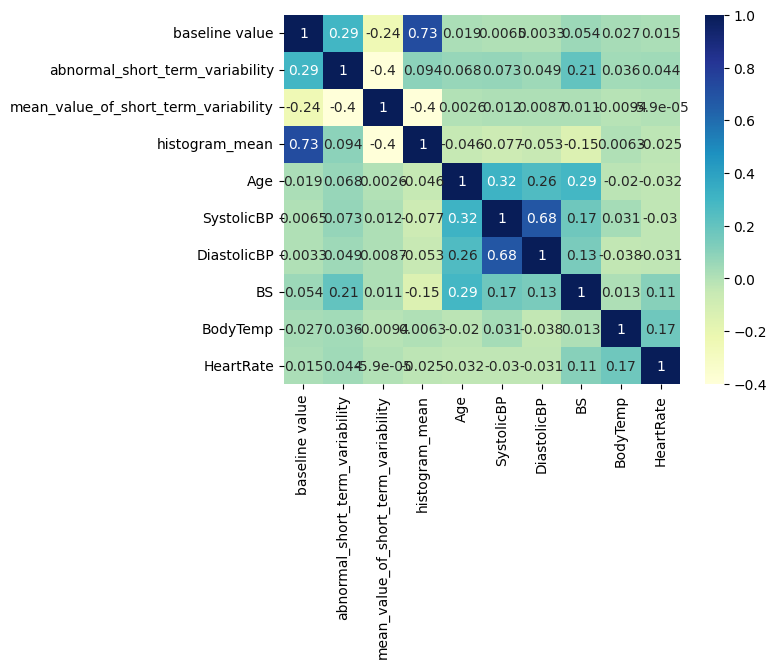

In [19]:
import matplotlib.pyplot as plt

print(combined_data.corr())
import seaborn as sb
dataplot = sb.heatmap(combined_data.corr(), cmap="YlGnBu", annot=True)
plt.show()



In [20]:
feature_cols =['baseline value','abnormal_short_term_variability','mean_value_of_short_term_variability','histogram_mean','Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
from sklearn.model_selection import train_test_split
X = combined_data[feature_cols]
y = combined_data.FetalRisk
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [74]:
###Decision tree and decision tree parameter tuning algorithm


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve,roc_curve, auc
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

arrayed_OVO=[]
arrayed_OVR=[]    
for i in range(1,16):
    trees = DecisionTreeClassifier(random_state=100, max_depth=i)
    trees.fit(X_train, y_train)
    X_train_predictions = trees.predict(X_train)
    X_train_probs = trees.predict_proba(X_train)
    tree_predictions = trees.predict(X_test)
    tree_probs = trees.predict_proba(X_test)


    ###Decision Tree AUC Scores for OVO and OVR

    roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
    print("The AUC for one vs one is: ", roc_value_1)

    roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
    print("The AUC is for one vs rest: ", roc_value_2)

    
    arrayed_OVO.append(roc_value_1)
    arrayed_OVR.append(roc_value_2)




print(arrayed_OVO)
print("OVO Best score is: ",max(arrayed_OVO) )
print("OVO best depth is", arrayed_OVO.index(max(arrayed_OVO)))
print("OVR Best score is: ",max(arrayed_OVR) )
print("OVR best depth is", arrayed_OVR.index(max(arrayed_OVR)))

if max(arrayed_OVO)>max(arrayed_OVR):
    best_depth=arrayed_OVO.index(max(arrayed_OVO))
else:
    best_depth=arrayed_OVO.index(max(arrayed_OVR))



trees = DecisionTreeClassifier(random_state=100, max_depth=best_depth)
trees.fit(X_train, y_train)
X_train_predictions = trees.predict(X_train)
X_train_probs = trees.predict_proba(X_train)
tree_predictions = trees.predict(X_test)
tree_probs = trees.predict_proba(X_test)


###Decision Tree AUC Scores for OVO and OVR

roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
print("The AUC for one vs one is: ", roc_value_1)

roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
print("The AUC is for one vs rest: ", roc_value_2)



The AUC for one vs one is:  0.6561508973221295
The AUC is for one vs rest:  0.7188543304053349
The AUC for one vs one is:  0.7577379545898285
The AUC is for one vs rest:  0.8120356372081655
The AUC for one vs one is:  0.8231264239226611
The AUC is for one vs rest:  0.8717010046109251
The AUC for one vs one is:  0.8904367797986031
The AUC is for one vs rest:  0.9005339826764359
The AUC for one vs one is:  0.9142243724777127
The AUC is for one vs rest:  0.9173718138009739
The AUC for one vs one is:  0.9402012507302838
The AUC is for one vs rest:  0.9409191747853387
The AUC for one vs one is:  0.9534140606834823
The AUC is for one vs rest:  0.9537751732712674
The AUC for one vs one is:  0.9638731779729866
The AUC is for one vs rest:  0.9599226037969975
The AUC for one vs one is:  0.9751983942581194
The AUC is for one vs rest:  0.9720360074707372
The AUC for one vs one is:  0.981359025685737
The AUC is for one vs rest:  0.976570464161891
The AUC for one vs one is:  0.9860798301935049
The A

In [75]:
feature_tree = pd.DataFrame({'Feature': feature_cols,
                   'Importance': trees.feature_importances_}).\
                    sort_values('Importance', ascending = False)
print(feature_tree)

                                Feature  Importance
7                                    BS    0.314819
3                        histogram_mean    0.258209
2  mean_value_of_short_term_variability    0.163052
1       abnormal_short_term_variability    0.091437
0                        baseline value    0.075246
5                            SystolicBP    0.042367
9                             HeartRate    0.024489
4                                   Age    0.016826
6                           DiastolicBP    0.011877
8                              BodyTemp    0.001677


In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(trees, X, y, cv=10, scoring= 'accuracy')
np.mean(scores)

decision_tree_score = np.mean(scores)

[Text(0.5049554003177673, 0.9666666666666667, 'X[7] <= 8.5\ngini = 0.194\nsamples = 292859\nvalue = [261877, 19292, 11690]'),
 Text(0.25822266164686375, 0.9, 'X[2] <= 0.45\ngini = 0.121\nsamples = 278254\nvalue = [260414, 13832, 4008]'),
 Text(0.18773746200607902, 0.8333333333333334, 'X[5] <= 132.5\ngini = 0.592\nsamples = 11968\nvalue = [5518, 5130, 1320]'),
 Text(0.15621546007184306, 0.7666666666666667, 'X[0] <= 143.5\ngini = 0.533\nsamples = 11002\nvalue = [5487, 5130, 385]'),
 Text(0.09980312240950538, 0.7, 'X[7] <= 6.95\ngini = 0.483\nsamples = 8367\nvalue = [5310, 2812, 245]'),
 Text(0.035783365570599614, 0.6333333333333333, 'X[4] <= 33.5\ngini = 0.153\nsamples = 2652\nvalue = [2430, 222, 0]'),
 Text(0.02072395689416966, 0.5666666666666667, 'X[6] <= 87.5\ngini = 0.068\nsamples = 2084\nvalue = [2010, 74, 0]'),
 Text(0.018513401492124895, 0.5, 'gini = 0.0\nsamples = 1560\nvalue = [1560, 0, 0]'),
 Text(0.022934512296214425, 0.5, 'X[5] <= 105.0\ngini = 0.243\nsamples = 524\nvalue = [

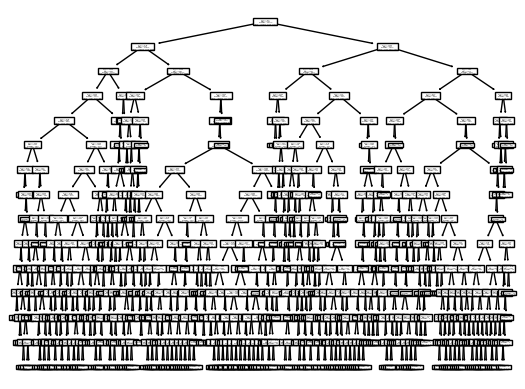

In [77]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=100, max_depth=best_depth)
clf = clf.fit(combined_data[feature_cols], combined_data.FetalRisk)
tree.plot_tree(clf)


In [37]:

from sklearn.ensemble import RandomForestClassifier




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True,
                       random_state=50, verbose=1)

Paremeter tuning the random forest was not performant on my machine, but here is the code 

from sklearn.ensemble import RandomForestClassifier


arrayed_OVO=[]
arrayed_OVR=[]    
for i in range(1,16):
    model = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=50, n_jobs=-1, verbose = 1,max_depth=i)
    model.fit(X_train, y_train) 
    X_train_predictions = model.predict(X_train)
    X_train_probs = model.predict_proba(X_train)

    rf_predictions = model.predict(X_test)
    rf_probs = model.predict_proba(X_test)


    ###Decision Tree AUC Scores for OVO and OVR

    roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
    print("The AUC for one vs one is: ", roc_value_1)

    roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
    print("The AUC is for one vs rest: ", roc_value_2)

    
    arrayed_OVO.append(roc_value_1)
    arrayed_OVR.append(roc_value_2)




print(arrayed_OVO)
print("OVO Best score is: ",max(arrayed_OVO) )
print("OVO best depth is", arrayed_OVO.index(max(arrayed_OVO)))
print("OVR Best score is: ",max(arrayed_OVR) )
print("OVR best depth is", arrayed_OVR.index(max(arrayed_OVR)))

if max(arrayed_OVO)>max(arrayed_OVR):
    best_depth=arrayed_OVO.index(max(arrayed_OVO)) +1
else:
    best_depth=arrayed_OVO.index(max(arrayed_OVR)) +1



trees = DecisionTreeClassifier(random_state=100, max_depth=best_depth)
trees.fit(X_train, y_train)
X_train_predictions = trees.predict(X_train)
X_train_probs = trees.predict_proba(X_train)
tree_predictions = trees.predict(X_test)
tree_probs = trees.predict_proba(X_test)


###Decision Tree AUC Scores for OVO and OVR

roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
print("The AUC for one vs one is: ", roc_value_1)

roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
print("The AUC is for one vs rest: ", roc_value_2)

In [82]:

###Random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=50, n_jobs=-1, verbose = 1)
model.fit(X_train, y_train) 
X_train_predictions = model.predict(X_train)
X_train_probs = model.predict_proba(X_train)

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)

roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
print("The AUC for one vs one is: ", roc_value_1)

roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
print("The AUC is for one vs rest: ", roc_value_2)

###Decision Tree AUC Scores for OVO and OVR

roc_value_1 = roc_auc_score(y_test, tree_probs,multi_class='ovo')
print("The AUC for one vs one is: ", roc_value_1)

roc_value_2 = roc_auc_score(y_test, tree_probs,multi_class='ovr')
print("The AUC is for one vs rest: ", roc_value_2)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

The AUC for one vs one is:  0.9930640710585878
The AUC is for one vs rest:  0.9916171642618683
The AUC for one vs one is:  0.9930640710585878
The AUC is for one vs rest:  0.9916171642618683


In [30]:
feature_model = pd.DataFrame({'Feature': feature_cols,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [31]:
scores = cross_val_score(model, X, y, cv=10, scoring= 'accuracy')
np.mean(scores)
random_forest_score = np.mean(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]:

In [88]:

###logistic regression model


from sklearn import linear_model


lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
logistic_reg = lm.score(X_test, y_test)

In [92]:
from sklearn import metrics

print((metrics.classification_report(y_test, lm.predict(X_test))))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97     65495
           2       0.69      0.18      0.29      4819
           3       0.86      0.70      0.77      2901

    accuracy                           0.93     73215
   macro avg       0.83      0.63      0.67     73215
weighted avg       0.92      0.93      0.91     73215



In [90]:
data = [['decision_tree_score', decision_tree_score], ['random_forest_score', random_forest_score],['logistic regression score',logistic_reg]]


df = pd.DataFrame(data, columns=['model','scores'])

df
fig = px.bar(df, x='model', y='scores',color='model',title="Model Selection from Cross Validation Scores",text_auto=True)
fig.show()